<a href="https://colab.research.google.com/github/mayeedit3/Cham/blob/master/Cham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.api as sm
#%matplotlib inline
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/master/perrin-freres-monthly-champagne-.csv')

In [17]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [18]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


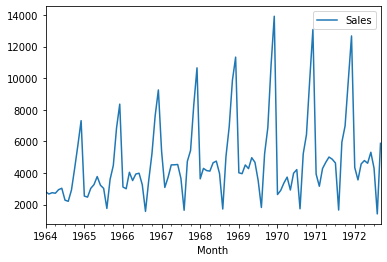

ADF Test Statistic : -1.8335930563276193
p-value : 0.36391577166024686
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
df.head()
#perrin-freres-monthly-champagne-
df.drop(106,axis=0,inplace=True)
df.drop(105,axis=0,inplace=True)
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
df.describe()
df.plot()
plt.show()
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Sales'])
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(df['Sales'])
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)